In [141]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('axes',titlesize=30)
plt.rc('axes',labelsize=30)
plt.rc('font',size=10)
plt.rc('xtick',labelsize=20)
plt.rc('ytick',labelsize=20)
plt.rc('legend',fontsize= 15)
pd.set_option('display.max_row', 50000)
plt.rc('font',family='NanumGothic')
mpl.rcParams['axes.unicode_minus']=False
%config InlineBackend.figure_format='retina'

In [142]:
import folium
import json
from folium import plugins
from folium.features import DivIcon

In [144]:
######## dataset 불러오기
df = pd.read_csv('야놀자!/통합_data/전북통합.csv',sep=',',encoding='cp949')
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1109 entries, 0 to 1108
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          1109 non-null   object 
 1   score         1109 non-null   float64
 2   loc           1109 non-null   object 
 3   lowest_price  1109 non-null   float64
 4   category      1109 non-null   object 
 5   loc2          1109 non-null   object 
 6   SIG_CD        1109 non-null   int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 60.8+ KB


In [146]:
print('전북 숙박업소 개수 : ', len(df))
print('전북 숙밥업소 모텔 개수 : ', (df['category']=='m').sum())
print('전북 숙밥업소 호텔 개수 : ', (df['category']=='h').sum())
print('전북 숙밥업소 팬션 개수 : ', (df['category']=='p').sum())
print('전북 숙밥업소 게스트하우스 개수 : ', (df['category']=='g').sum())

전북 숙박업소 개수 :  1109
전북 숙밥업소 모텔 개수 :  440
전북 숙밥업소 호텔 개수 :  82
전북 숙밥업소 팬션 개수 :  407
전북 숙밥업소 게스트하우스 개수 :  180


In [147]:
total = len(df)
mtotal = (df['category']=='m').sum()
htotal = (df['category']=='h').sum()
ptotal = (df['category']=='p').sum()
gtotal = (df['category']=='g').sum()

In [148]:
### sort
dfc1 = df.sort_values(by=['category'])

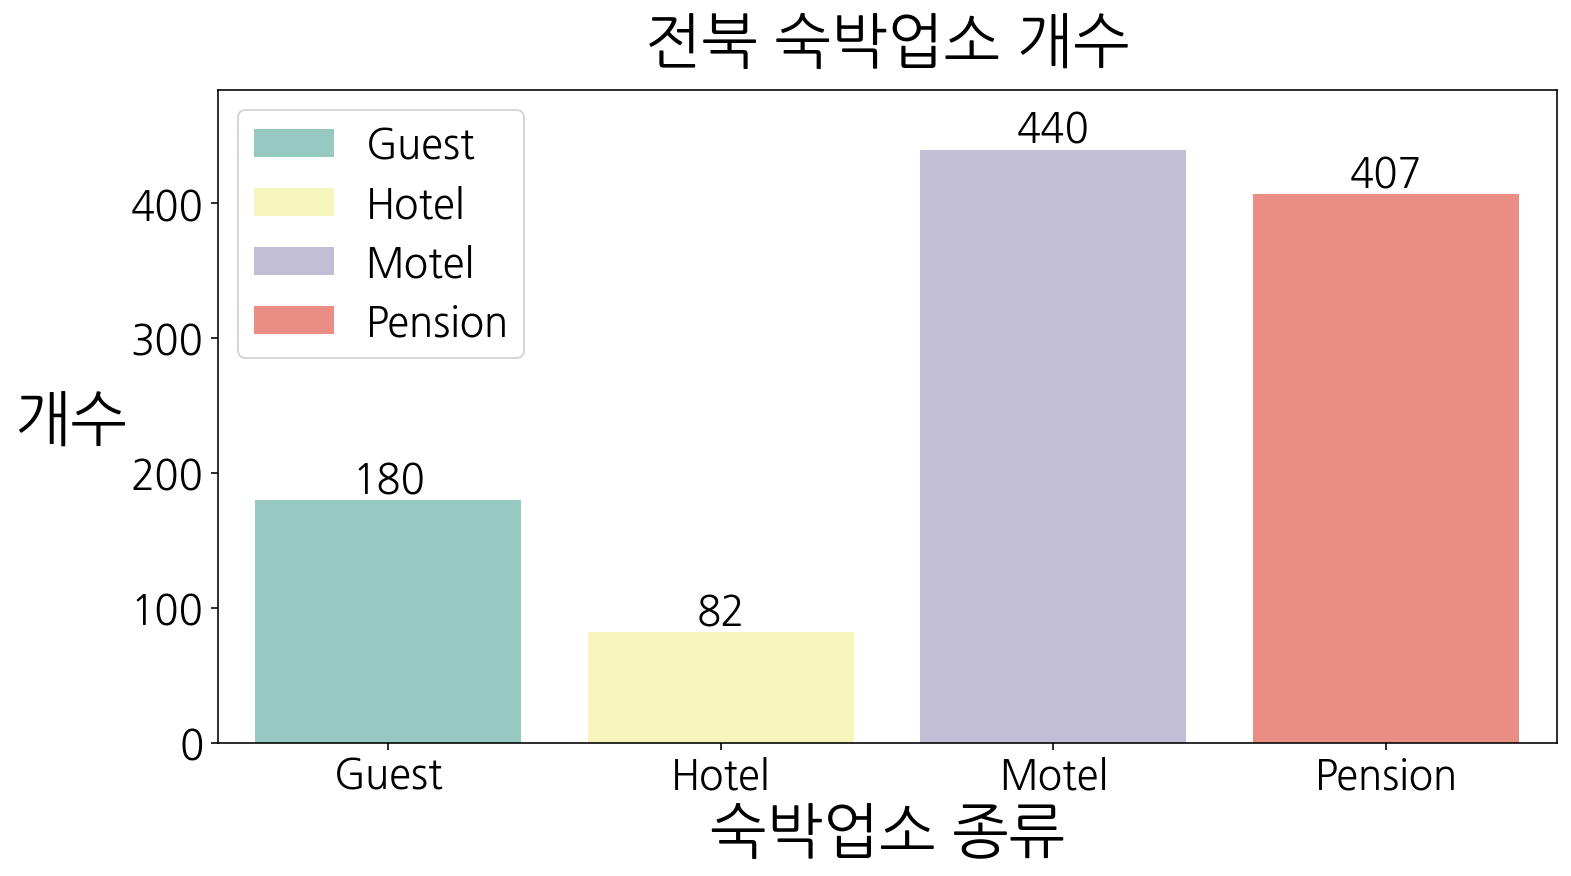

In [151]:
################### 전북 숙박업소 개수 그래프
ax = plt.figure(figsize=(12,6))
ax = sns.countplot(data = dfc1, x='category',hue = 'category',palette='Set3',dodge=False)
ax.set_title('전북 숙박업소 개수',
            pad=15.0)
ax.set_xlabel('숙박업소 종류')
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['Guest','Hotel','Motel','Pension'])
ax.set_ylabel('개수',rotation=0,labelpad=30,position=(0,0.45,0))
plt.legend(labels=['Guest','Hotel','Motel','Pension'],fontsize=20)
plt.text(0,gtotal,gtotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(1,htotal,htotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(2,mtotal,mtotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.text(3,ptotal,ptotal,fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.margins(0.03, 0.1)
#plt.show()
plt.savefig('전북 숙박업소 개수.png',bbox_inches='tight', pad_inches=0.5) 

In [152]:
########### 지도 시각화용 dataset
df2=df.groupby(df['loc2']).mean()
df2.reset_index(level=['loc2'],inplace=True)
df_count=df.groupby('loc2').size()
df_count.reset_index(drop=True,inplace=True)
df2['count']=df_count
df2 = df2.sort_values(by='lowest_price',ascending=False)
df2.reset_index(drop=True,inplace=True)
df2['SIG_CD'] = df2['SIG_CD'].astype(str)

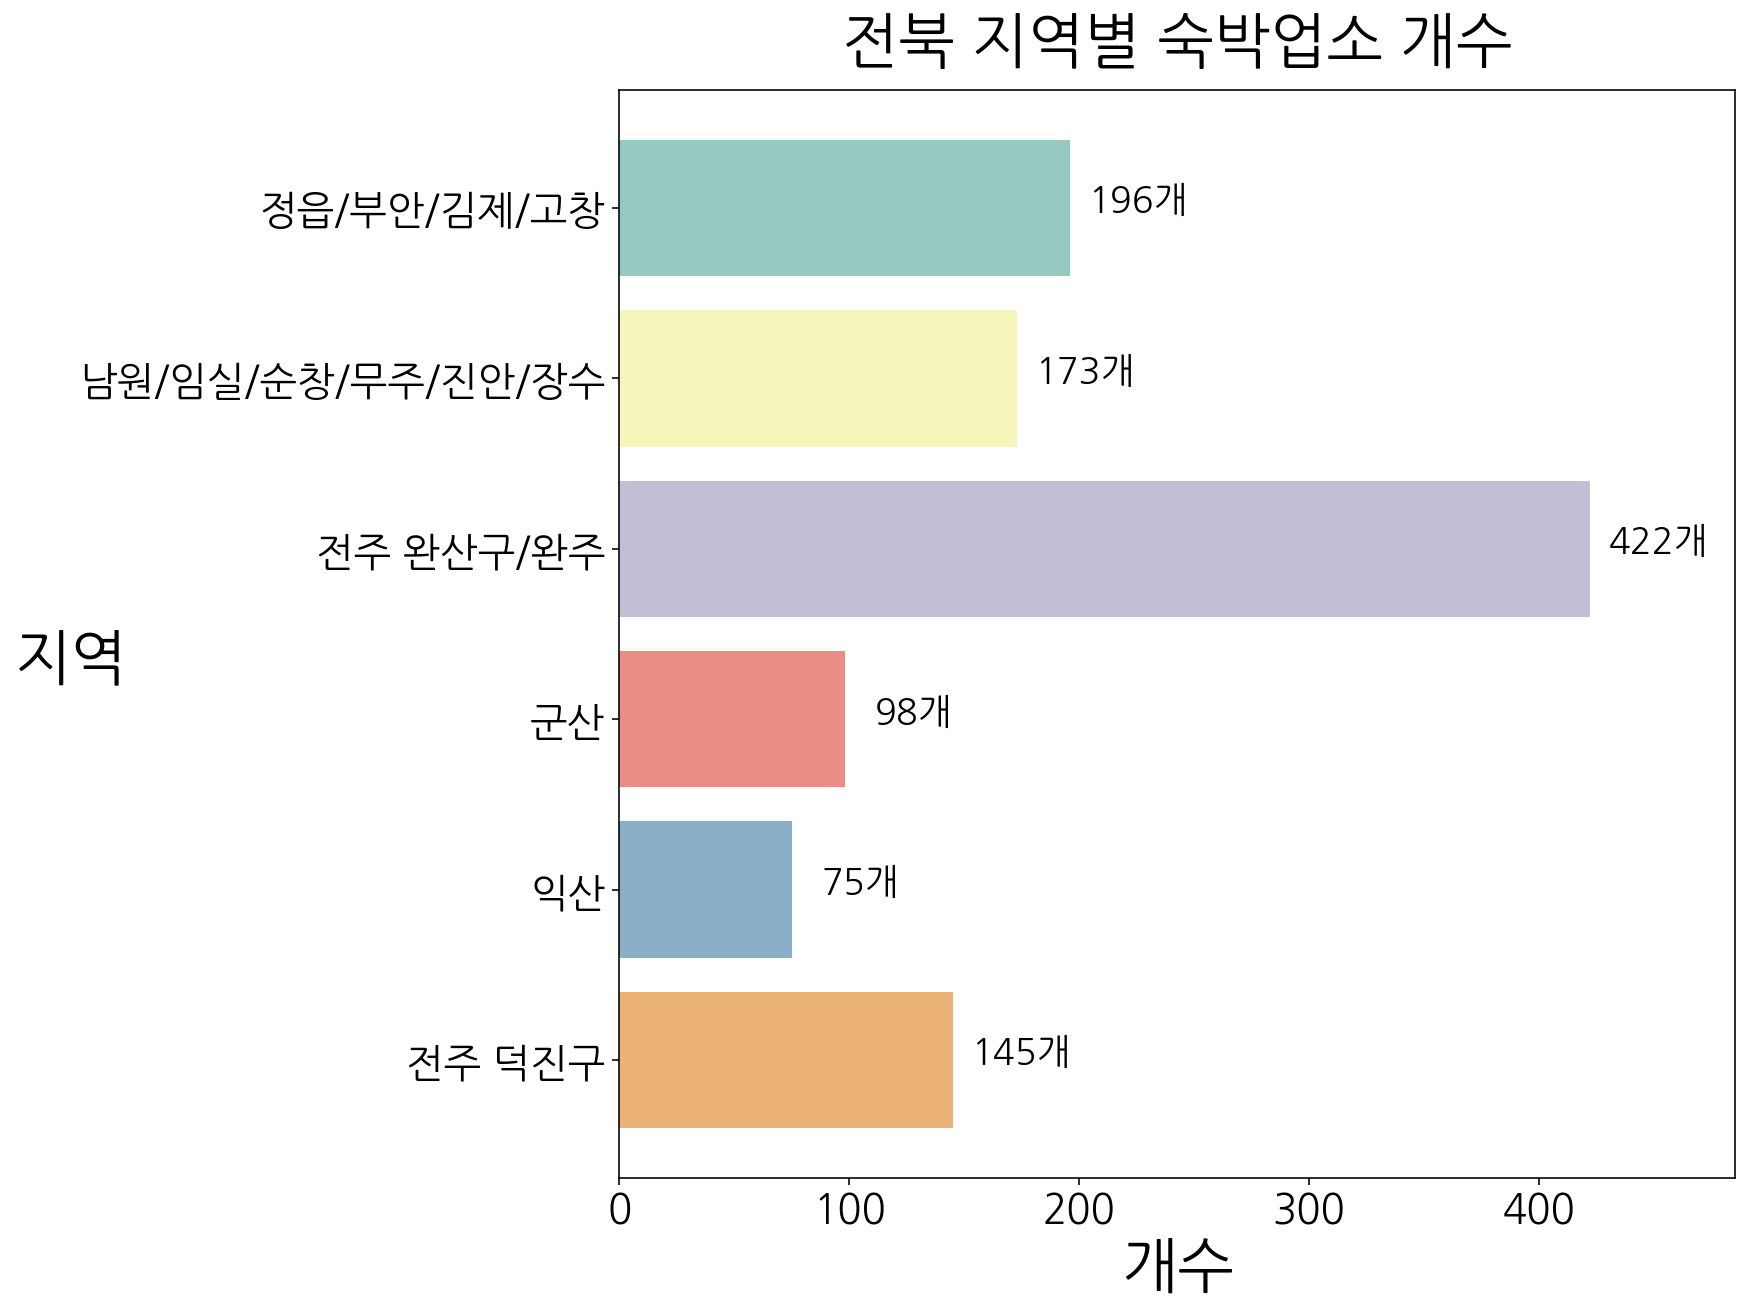

In [155]:
############## 전북 지역별 숙박업소 개수
ax = plt.figure(figsize=(10,10))
ax = sns.barplot(data = df2, x='count', y = 'loc2',palette='Set3')
ax.set_title('전북 지역별 숙박업소 개수',
            pad=15.0)
ax.set_xlabel('개수')
ax.set_ylabel('지역',rotation=0,position=(0,0.45,0))
for p in ax.patches:
    ax.annotate(f'\n{int(p.get_width())}개', (p.get_width()+30,p.get_y()+0.03), ha='center', va='top', color='black', size=18)
plt.margins(0.15,0.05)
#plt.show()
plt.savefig('전북 지역별 숙박업소 개수.png',bbox_inches='tight', pad_inches=0.5) 

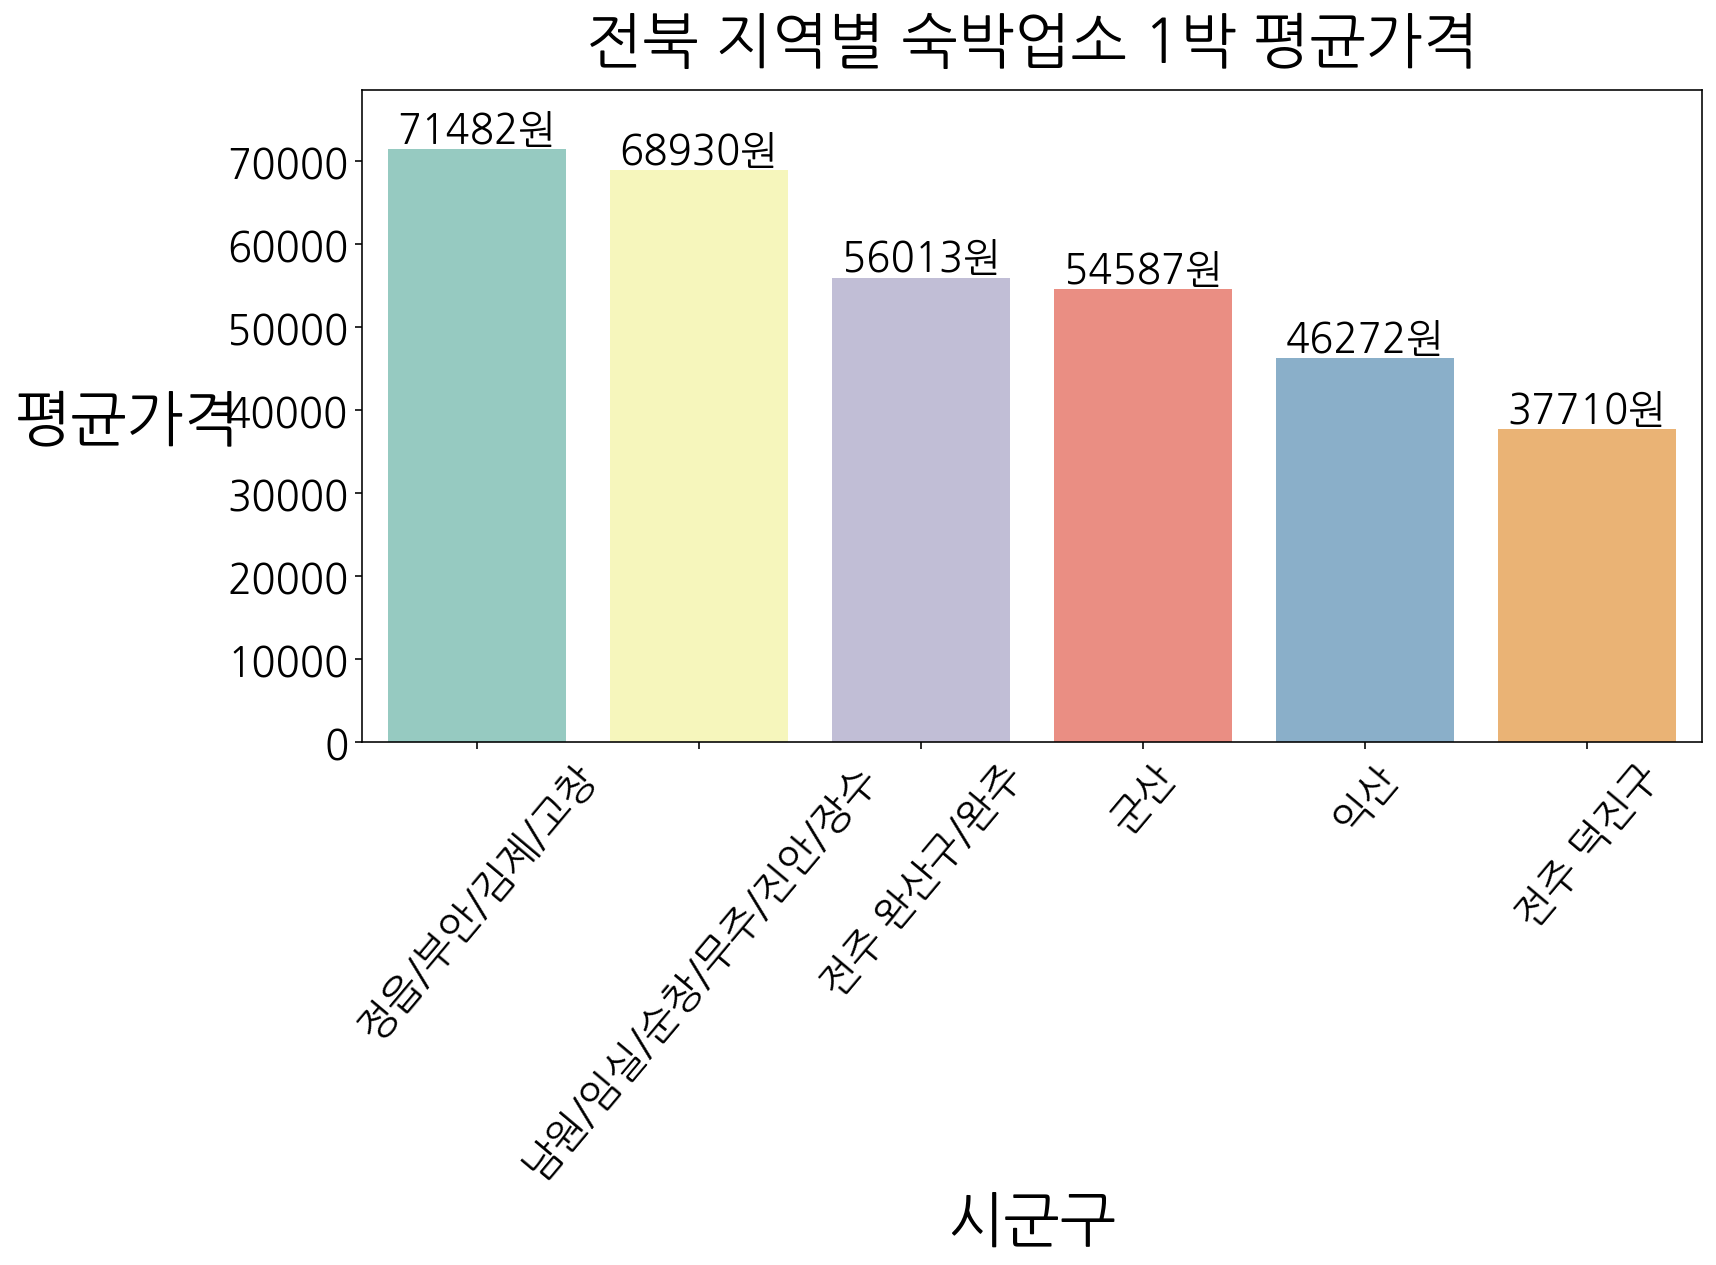

In [157]:
############## 전북 지역별 평균숙박업소 가격 그래프
########## 모든 업소의 최저가격을 가지고 추산한 것임으로 종합 가격 평균은 아님.
ax = plt.figure(figsize=(12,6))
ax = sns.barplot(data = df2, x='loc2', y = 'lowest_price',palette='Set3')
ax.set_title('전북 지역별 숙박업소 1박 평균가격',
            pad=15.0)
ax.set_xlabel('시군구')
ax.set_ylabel('평균가격',rotation=0,labelpad=50,position=(0,0.45,0))
for i in range(len(df2)):
    plt.text(i,round(df2.iloc[i][2]),str(round(df2.iloc[i][2]))+'원',fontsize=20,color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.xticks(rotation=50)
plt.margins(0.02, 0.1)
#plt.show()
plt.savefig('전북 지역별 숙박업소 1박 평균가격.png',bbox_inches='tight', pad_inches=0.5) 

In [158]:
df2

,loc2,score,lowest_price,SIG_CD,count
0,정읍/부안/김제/고창,4.249490,71482.489796,45180,196
1,남원/임실/순창/무주/진안/장수,4.273410,68929.965318,45190,173
2,전주 완산구/완주,4.151896,56012.654028,45111,422
3,군산,4.271429,54586.561224,45130,98
4,익산,4.280000,46272.373333,45140,75
5,전주 덕진구,4.415172,37710.013793,45113,145


In [159]:
m = folium.Map(location=[35.3, 127.0],zoom_start=8)
state_geo = 'final.zip.geojson'
state_geo2 = json.load(open(state_geo,encoding='utf8'))
folium.Choropleth(geo_data=state_geo2,data=df2,columns=('SIG_CD','lowest_price'),
                              key_on='feature.properties.SIG_CD',fill_color='YlOrRd',legend_name='평균 가격').add_to(m)
folium.Marker([35.73230153821703, 126.90006984832077],tooltip = df2['loc2'][0]+' : '+str(int(df2['lowest_price'][0]))+'원').add_to(m)
folium.Marker([35.69140537662063, 127.38374565323059],tooltip = df2['loc2'][1]+' : '+str(int(df2['lowest_price'][1]))+'원').add_to(m)
folium.Marker([35.89831287865393, 127.2406546592381],tooltip = df2['loc2'][2]+' : '+str(int(df2['lowest_price'][2]))+'원').add_to(m)
folium.Marker([35.946919568531, 126.73015255956867],tooltip = df2['loc2'][3]+' : '+str(int(df2['lowest_price'][3]))+'원').add_to(m)
folium.Marker([36.02464311167163, 126.99645162567823],tooltip = df2['loc2'][4]+' : '+str(int(df2['lowest_price'][4]))+'원').add_to(m)
folium.Marker([35.864146095927374, 127.11354241826419],tooltip = df2['loc2'][5]+' : '+str(int(df2['lowest_price'][5]))+'원').add_to(m)
m

In [160]:
m.save('전북 숙밥업소 1박 평균가격.html')

In [163]:
#### 시군구별 숙박업소 개수
m = folium.Map(location=[35.3, 127.0],zoom_start=8)
state_geo = 'final.zip.geojson'
state_geo2 = json.load(open(state_geo,encoding='utf8'))
folium.Choropleth(geo_data=state_geo2,data=df2,columns=('SIG_CD','count'),
                              key_on='feature.properties.SIG_CD',fill_color='YlOrRd',legend_name='숙박업소 개수').add_to(m)
folium.Marker([35.73230153821703, 126.90006984832077],tooltip = df2['loc2'][0]+' : '+str(int(df2['count'][0]))+'개').add_to(m)
folium.Marker([35.69140537662063, 127.38374565323059],tooltip = df2['loc2'][1]+' : '+str(int(df2['count'][1]))+'개').add_to(m)
folium.Marker([35.89831287865393, 127.2406546592381],tooltip = df2['loc2'][2]+' : '+str(int(df2['count'][2]))+'개').add_to(m)
folium.Marker([35.946919568531, 126.73015255956867],tooltip = df2['loc2'][3]+' : '+str(int(df2['count'][3]))+'개').add_to(m)
folium.Marker([36.02464311167163, 126.99645162567823],tooltip = df2['loc2'][4]+' : '+str(int(df2['count'][4]))+'개').add_to(m)
folium.Marker([35.864146095927374, 127.11354241826419],tooltip = df2['loc2'][5]+' : '+str(int(df2['count'][5]))+'개').add_to(m)

m
### 색상 https://dailyheumsi.tistory.com/m/144?category=854906

In [164]:
m.save('전북 숙밥업소 수.html')